<Body>   
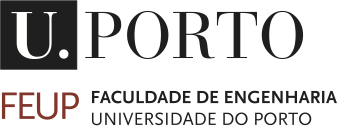   
<h1> <b>Computer Vision 2022/2023 </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

# **Morphological Operators and Connected Components Analysis**

<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#ref1">Binary Image Processing Binary Image Processing</a></li>
    <li><a href="#ref2">Connected Component Labeling</a></li>
</ol>
<p></p>
</div>
<hr>


<a id="ref1"></a>
# **Binary Image Processing**

A binary image is a gray-scale image in which each pixel can have one of two possible values:
- 0 (black);
- 1 (white).

<figure>
<img src='https://drive.google.com/uc?export=view&id=1j2w6vdOi9b6t9t4w66gUiCxyo50tfffB' width=530 >
<figcaption> Source: Matlab. </figcaption>
</figure>

Let's convert a color image to a binary one and see which operations we can apply to it.

Please upload 'penguins.jpg'.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins.jpg to penguins.jpg


The following code snippet loads a color image, converts it to grayscale and then to binary using *cv2.threshold()*. 

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Load image
img = cv2.imread('penguins.jpg')

# Convert from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

# Convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Convert to binary
threshold = 127
max_value = 255
thresh_type = cv2.THRESH_BINARY
binary = cv2.threshold(gray, threshold, max_value, thresh_type)[1] # This function returns a tuple: (threshold, binary_image), hence the [1]

# Display image using plt
plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(img)
plt.title("Color Image")
plt.axis("off")

plt.subplot(132)
plt.imshow(gray,cmap="gray")
plt.title("Gray Image")
plt.axis("off")

plt.subplot(133)
plt.imshow(binary,cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.show()

Let's see what changed within the structures holding these images:

In [ ]:
print('Color img:     ', img.shape)

print('Grayscale img: ', gray.shape)

print('Binary img:    ', binary.shape)

As we already know, an RGB image has 3 values per pixel (Red-Green-Blue), which is why its shape is 450x450x3. A gray-scale image only has one value per pixel and so does a binary image.

A gray-scale image allows pixel values to vary within the range [0;255], where the value 0 corresponds to black and 255 to white. A binary image, on the other hand, only allows for the two ends of the interval: either 0 or 255 (255 actually corresponds to the value of 1 that we mentioned in the beginning of this lesson). 

Considering this, we set a threshold to the middle value of the interval, i.e., 127, and then used *cv2.threshold()* to set to 0 any value below that threshold and to 255 any value above. This means that lighter pixels turn white and darker ones turn black, as we saw in the images displayed above.

Let's verify this by checking the content of a random row of both the gray-scale and binary images:

In [ ]:
print('Grayscale img:\n', gray[200][:100])

print('Binary img:\n', binary[200][:100])

Feel free to vary the threshold value and observe the effect on the resulting binary image.

In our particular color image, given the light scenery and dark characters, we've obtained a binary image in which the background is white and the objects are black. However, it is more conventional in Computer Vision to have the background represented as black and the foreground objects as white. To change our image according to this convention, we simply have to use *cv2.THRESH_BINARY_INV* instead of *cv2.THRESH_BINARY* as the threshold type when calling *cv2.threshold()*. 
Execute the following code snippet to apply this operation. You may check the content of the new binary image and verify that the 0's and 255's have been swapped.

In [ ]:
# Convert to binary
thresh_type = cv2.THRESH_BINARY_INV
inv_binary = cv2.threshold(gray, threshold, max_value, thresh_type)[1]

# Display image using plt
plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(binary,cmap="gray")
plt.title("Binary image")
plt.axis("off")

plt.subplot(122)
plt.imshow(inv_binary,cmap="gray")
plt.title("Inverted binary image")
plt.axis("off")

plt.show()

**Morphological Operations**

Morphological operations are image operations that change
the shape of the objects present in a binary image. To apply these operations we perform a convolution between the binary image and a binary structuring element. This element can have any size or shape (it usually is a circle or a square). Let's consider a *3x3* kernel of ones, for example:

$$
kernel = 
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}
$$

Depending on the specificity of the convolution operation, we may obtain different results with the same kernel. We may, for example, compute the maximal pixel value overlapped by the kernel and set the image pixel in the anchor point position (center of the kernel) with that maximal value. By doing this, a few pixels with value 0 will turn into 1's, and the white regions of the image will grow. This is called **dilation**.

Execute the following code snippet, which uses OpenCV's *cv2.dilate()* to apply this operation to our binary image.

In [ ]:
kernel = np.ones((5, 5), 'uint8')

dilated = cv2.dilate(inv_binary, kernel, iterations=1)

# Display image using plt
plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(inv_binary,cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(dilated,cmap="gray")
plt.title("Dilated")
plt.axis("off")

plt.show()

If, instead, we compute the minimal pixel value overlapped by the kernel, then a few pixels of value 1 will turn into 0's, and the white regions will recede. This is called **erosion**.

Experiment with *cv2.erode()* to verify this effect.

In [ ]:
eroded = cv2.erode(inv_binary, kernel, iterations=1)

# Display image using plt
plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(inv_binary,cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(eroded,cmap="gray")
plt.title("Eroded")
plt.axis("off")

plt.show()

You have learnt in class that dilation and erosion can be combined to form more complex operations such as opening and closing.

**Exercise 1**

**(a)** Implement opening and closing procedures using the two functions presented above.

In [ ]:
# TO DO

# Display image using plt
plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(inv_binary,cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(132)
plt.imshow(closed,cmap="gray")
plt.title("Closed")
plt.axis("off")

plt.subplot(133)
plt.imshow(opened,cmap="gray")
plt.title("Opened")
plt.axis("off")

plt.show()

**(b)** Considering what you've learnt in the lectures and your newly acquired practical experience, comment on the changes caused by the opening and closing processes on the binary image.

<a id="ref2"></a>
# **Connected-Component Labeling**

Connected-Component Labeling (CCL) consists in assignining a unique label to all the pixels composing each connected component (i.e., each object) in a binary image. Essentially, it is used to segment objects, as you can see in the images below:

<figure>
<img src='https://drive.google.com/uc?export=view&id=1e3i5gGlntHNfvzYEsdrj3GfpADBTQ9QP' width=530 >
<figcaption> Source: Scipy. </figcaption>
</figure>

The result of performing CCL on a binary image should be a matrix in which each pixel has a label 0 if it belongs to the background or the label of the object it is part of. The matrix below, for example, represents an image which contains two objects.


$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
1 & 1 & 1 & 0 & 0 & 0 & 2 & 2 & 0\\
1 & 1 & 1 & 1 & 0 & 0 & 2 & 2 & 0\\
0 & 0 & 1 & 1 & 0 & 0 & 2 & 2 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
\end{bmatrix}
$$


But how do we determine which pixels are connected to each other?

Connected Components in an image are sets of pixels with the same value that are connected through some kind of adjacency. For example, you've learnt in class about Four Pixel Connectivity ($N_4$), Eight Pixel Connectivity ($N_8$) or D-Connectivity ($N_D$).



<figure>
<img src='https://drive.google.com/uc?export=view&id=1cXMf_rbx4WqI43Mo3aGHY4k-9rSD8Wz4' width=550 >
</figure>

OpenCV's *cv2.connectedComponents()* uses this connectivity assumption to identify the connected components in a binary image. This allows us to, for example, determine the number of objects in the image, which is useful for a number of applications, such as industrial manufacturing and robotic navigation.

**Exercise 2**

A donut factory is automating procedures. To check if the number of donuts placed in each box is the correct one, they're using visual cameras that capture top-down-view images as the boxes are moved to the final station. In this exercise you're going to use what you've learnt about connected components to determine if a box contains exactly 5 chocolate donuts.

Please upload 'chocolatedonuts.jpg'.

In [ ]:
from google.colab import files
uploaded = files.upload()

**(a)** Perform CCL on the chocolate donut box image without applying morphological operations. Paint each segmented object with a different colour, as show in the example above. How many different objects did you obtain?

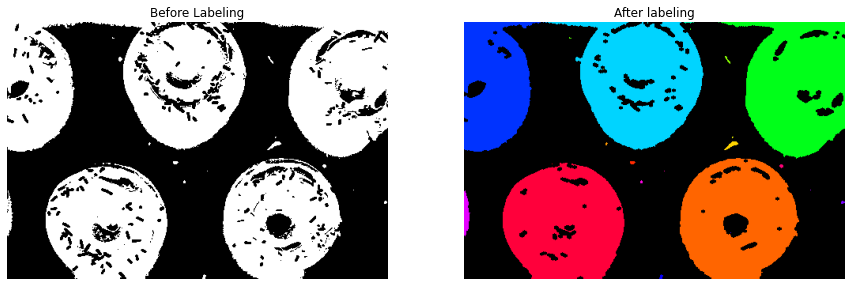

In [ ]:
# TO DO

# Display image using plt
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(binary,cmap="gray")
plt.title("Before Labeling")
plt.axis("off")

plt.subplot(122)
plt.imshow(labeled_img)
plt.title("After labeling")
plt.axis("off")

plt.show()

**(b)** Using morphological operations, obtain the exact number of donuts in the box.

In [ ]:
# TO DO

# Display image using plt
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(binary,cmap="gray")
plt.title("Before Labeling")
plt.axis("off")

plt.subplot(122)
plt.imshow(labeled_img)
plt.title("After labeling")
plt.axis("off")

plt.show()

**(c)** Compute statistics for each component: bounding box, area (in pixels) and centroid. Display the objects' centroids in the coloured image.

In [ ]:
# TO DO

# References

https://docs.opencv.org/3.4.15/db/df6/tutorial_erosion_dilatation.html